# Supress Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#  Reading and Understanding the Data

In [4]:
from google.colab import files
files.upload()
day = pd.read_csv('day.csv')
day.head()

Saving day.csv to day (1).csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
day.shape

(730, 16)

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Visualising the Data

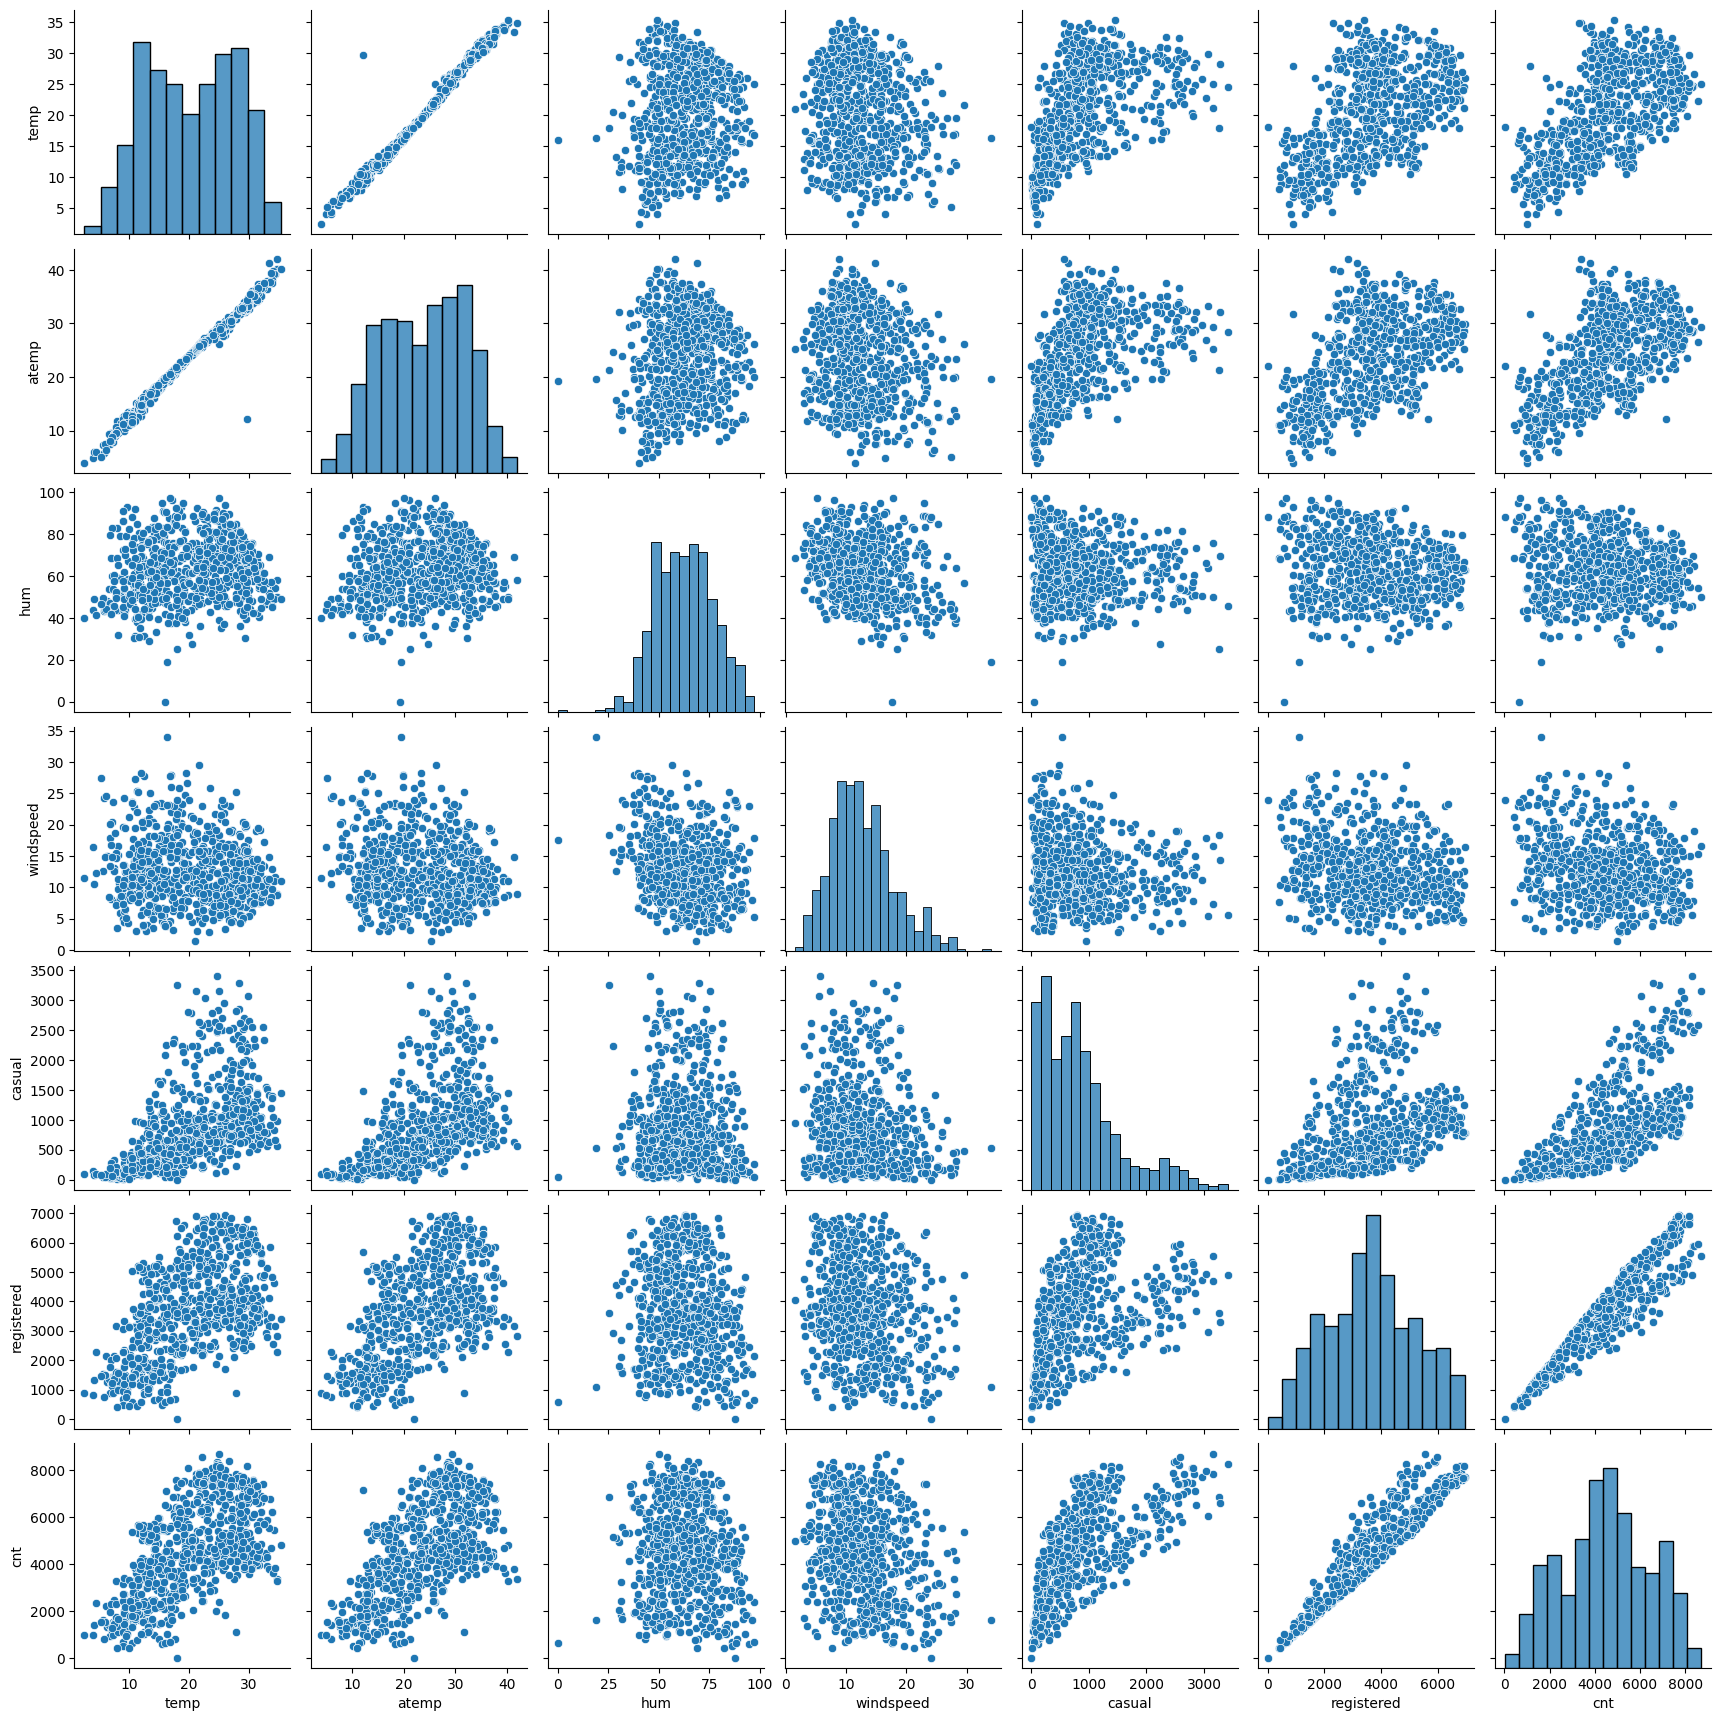

In [8]:
sns.pairplot(day,vars=["temp","atemp","hum","windspeed","casual","registered","cnt"])
plt.show()

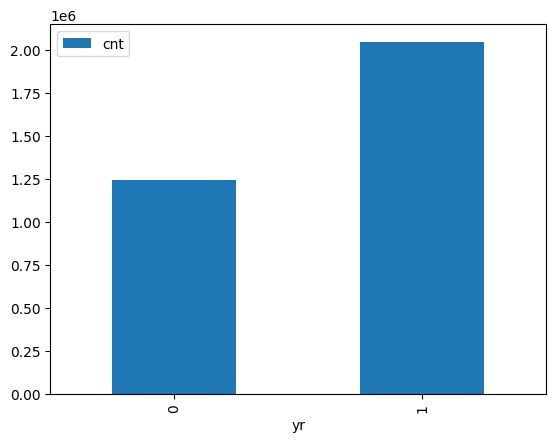

In [9]:
yr = day.groupby(['yr'])['cnt'].sum().reset_index()
yr.plot(kind='bar', x='yr', y='cnt' )
plt.show()

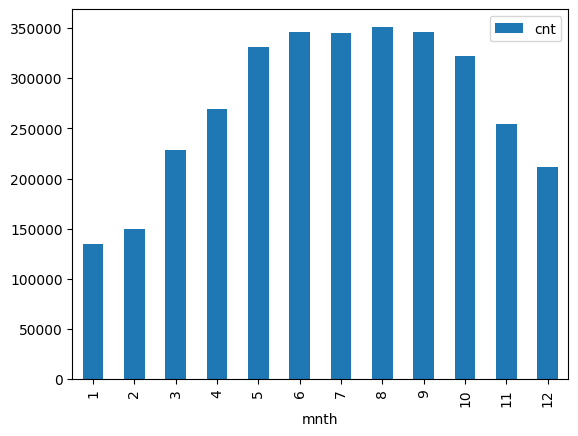

In [10]:
mn = day.groupby(['mnth'])['cnt'].sum().reset_index()
mn.plot(kind='bar', x='mnth', y='cnt' )
plt.show()

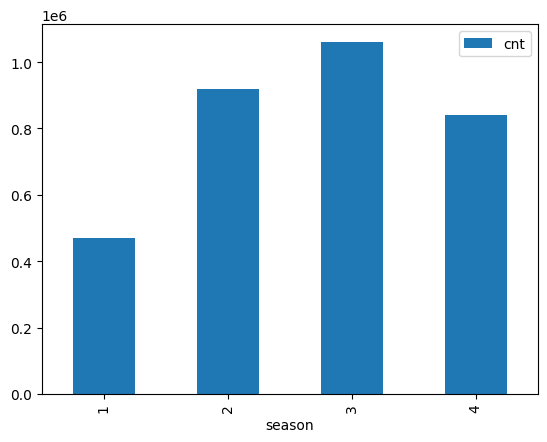

In [11]:
sn = day.groupby(['season'])['cnt'].sum().reset_index()
sn.plot(kind='bar', x='season', y='cnt' )
plt.show()

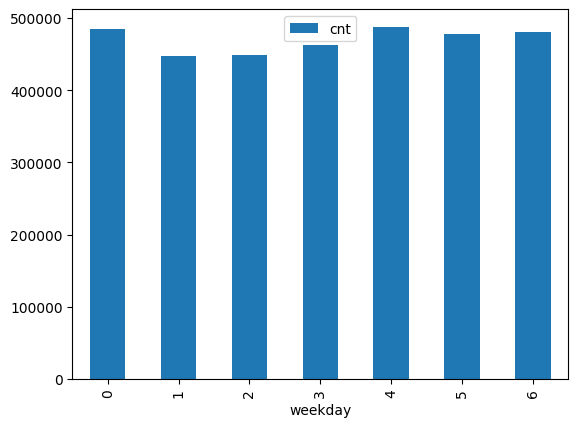

In [12]:
w = day.groupby(['weekday'])['cnt'].sum().reset_index()
w.plot(kind='bar', x='weekday', y='cnt' )
plt.show()

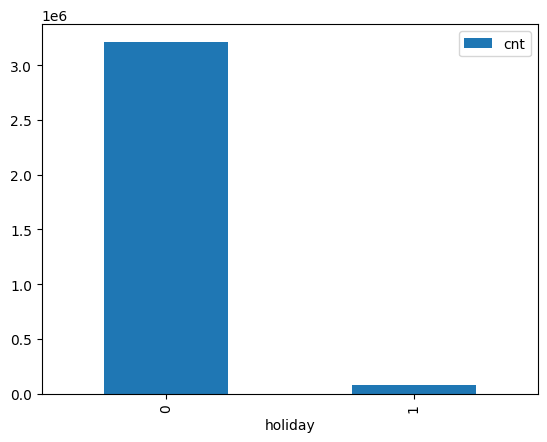

In [13]:
h = day.groupby(['holiday'])['cnt'].sum().reset_index()
h.plot(kind='bar', x='holiday', y='cnt' )
plt.show()

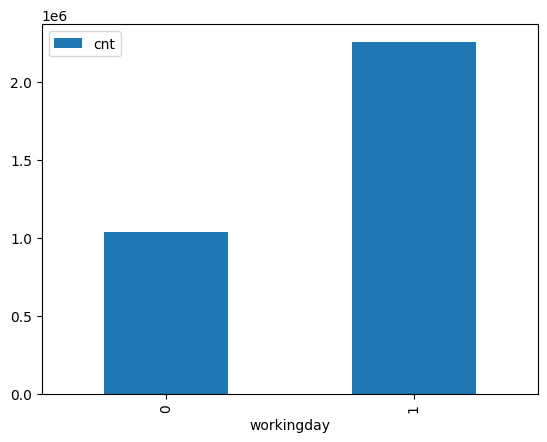

In [14]:
wr= day.groupby(['workingday'])['cnt'].sum().reset_index()
wr.plot(kind='bar', x='workingday', y='cnt' )
plt.show()

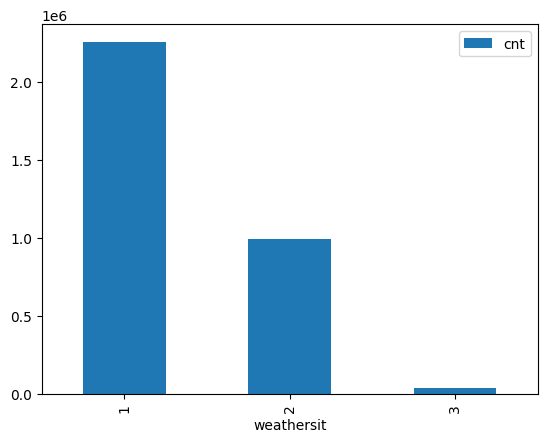

In [15]:
we = day.groupby(['weathersit'])['cnt'].sum().reset_index()
we.plot(kind='bar', x='weathersit', y=['cnt'] )
plt.show()